---

## 🧩 **Task 2: Credit Risk Prediction**

### 🎯 **Objective:**  
The goal of this task is to **predict whether a loan applicant is likely to default on a loan** using a machine learning classification model.

### 📂 **Dataset:**  
We will use the **Loan Prediction Dataset** (available on Kaggle), which contains applicant details such as income, loan amount, credit history, and education status.

This dataset is widely used to practice **data preprocessing**, **feature analysis**, and **predictive modeling**.

### 📝 **Task Instructions:**  
1. **Handle missing data** appropriately using imputation or removal techniques.  
2. **Visualize key features** such as loan amount, education, and income to identify trends and relationships.  
3. **Train a classification model** such as:
   - **Logistic Regression**, or  
   - **Decision Tree Classifier**  
4. **Evaluate model performance** using:
   - **Accuracy score**  
   - **Confusion matrix** to analyze correct and incorrect predictions.

### 🧩 **Skills Covered:**  
- Data cleaning and handling missing values  
- Exploratory Data Analysis (EDA)  
- Binary classification using machine learning  
- Model evaluation using accuracy and confusion matrix  

💡 *This task helps develop practical skills in data preprocessing, visualization, and building predictive models for real-world business problems.*

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Loan_Prediction.csv')

In [6]:
print("DataSet Shape:", df.shape)
print("\nDataSet Columns:",df.columns)
print("\nFirst 5 Rows: \n",df.head())

DataSet Shape: (2000, 7)

DataSet Columns: Index(['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term',
       'Employment_Status', 'Loan_Approved'],
      dtype='object')

First 5 Rows: 
    Age  Income  Credit_Score  Loan_Amount  Loan_Term Employment_Status  \
0   56   81788           334        15022         48          Employed   
1   69  102879           781        21013         24     Self-Employed   
2   46   58827           779        39687         60     Self-Employed   
3   32  127188           364        16886         24        Unemployed   
4   60   25655           307        26256         36        Unemployed   

   Loan_Approved  
0              0  
1              1  
2              0  
3              0  
4              0  


In [7]:
df.dtypes

,0
Age,int64
Income,int64
Credit_Score,int64
Loan_Amount,int64
Loan_Term,int64
Employment_Status,object
Loan_Approved,int64


In [10]:
# Check missing values
df.isnull().sum()

# Fill missing values for numerical features with median
num_cols = df.select_dtypes(include=['int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values for categorical features with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify no missing values remain
df.isnull().sum()

,0
Age,0
Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term,0
Employment_Status,0
Loan_Approved,0


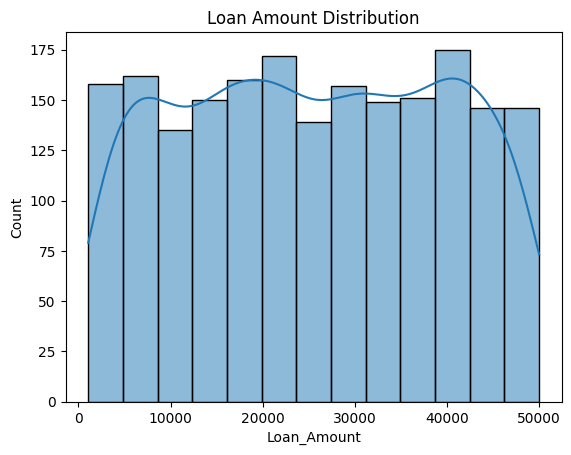

In [12]:
# Loan Amount distribution
sns.histplot(df['Loan_Amount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

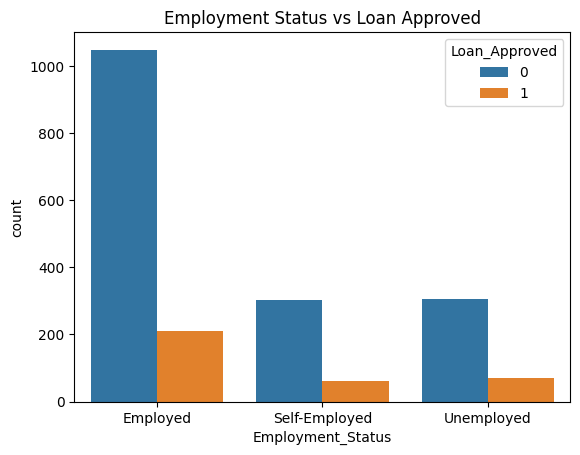

In [14]:
# Employment Status vs Loan Approved
sns.countplot(x='Employment_Status', hue='Loan_Approved', data=df)
plt.title("Employment Status vs Loan Approved")
plt.show()

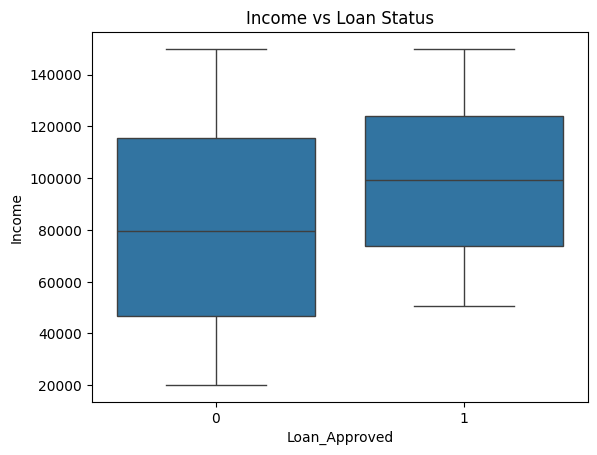

In [15]:
# Applicant Income vs Loan Status
sns.boxplot(x='Loan_Approved', y='Income', data=df)
plt.title("Income vs Loan Status")
plt.show()

In [40]:
scaler = StandardScaler()
features_to_scale = ['Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [46]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [48]:
encode = LabelEncoder()
df['Loan_Approved'] = encode.fit_transform(df['Loan_Approved'])

In [49]:
X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round((acc)*100,2),"%")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 91.25 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       322
           1       0.84      0.68      0.75        78

    accuracy                           0.91       400
   macro avg       0.88      0.82      0.85       400
weighted avg       0.91      0.91      0.91       400



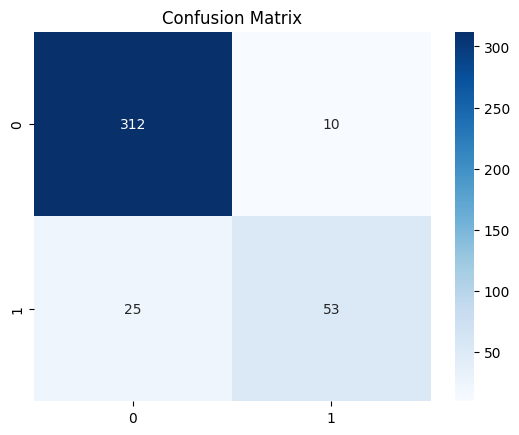

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## **Results:**

The classification model achieved an **accuracy of 91%** on the test set, indicating that it correctly predicts loan default status in the majority of cases.

**From the classification report:**

- For **non-defaulting applicants (0)**, the model shows very high precision (0.93) and recall (0.97), meaning it reliably identifies applicants who are unlikely to default.  
- For **defaulting applicants (1)**, precision is 0.83 and recall is 0.68, indicating the model is less effective at identifying potential defaulters, though it still performs reasonably well.  
- The **weighted F1-score of 0.91** confirms overall strong model performance, though there is room to improve recall for the minority class (defaults).

**Insights:**

- The model is biased slightly towards predicting non-defaults due to class imbalance (more non-default cases).  
- Decision-making for credit risk is reliable for general approval, but additional strategies (e.g., oversampling, more features, or ensemble models) could improve identification of high-risk applicants.